In [7]:
%pylab inline
import os
import numpy as np
import pandas as pd
import imageio.v2 as imageio
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras

Populating the interactive namespace from numpy and matplotlib


In [8]:
pip install imageio


In [9]:
#to stop pottential randomness
seed = 128
rng= np.random.RandomState(seed)


In [10]:
#first step is to set dictionary path for safekeeping
rootdir = os.path.abspath("./.")
data_dir = os.path.join(rootdir, "data")
sub_dir = os.path.join(rootdir , "sub")



In [11]:
#checking for existance
os.path.exists(rootdir)
os.path.exists(data_dir)
os.path.exists(sub_dir)

False

In [12]:
#step 1 : data loading and preprocessing
train = pd.read_csv(os.path.join(data_dir,  '/content/train.csv'))
test = pd.read_csv(os.path.join(data_dir, '/content/test.csv'))

In [13]:
sample_submission = pd.read_csv(os.path.join(data_dir, '/content/sample_submission.csv'))

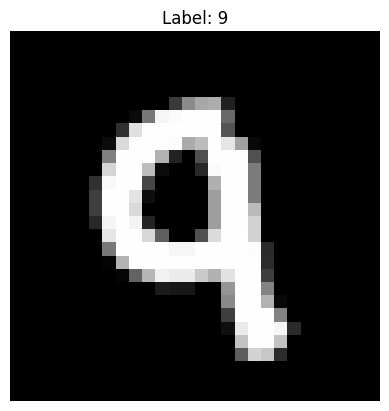

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# pick a random row
sample = train.sample(1).iloc[0]
label = sample['label']

# reshape the 784 pixels into 28×28
img = sample.drop('label').to_numpy().reshape(28, 28)

# plot
plt.imshow(img, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()


In [16]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# ----- Training set -----
# Separate features and labels
train_x = train.drop('label', axis=1).to_numpy(dtype='float32') / 255.0
train_x = train_x.reshape(-1, 784)  # already flat but keeps shape explicit
train_y = to_categorical(train['label'].to_numpy(), num_classes=10)

# ----- Test set -----
# If your test CSV has only pixel columns
test_x = test.to_numpy(dtype='float32') / 255.0
test_x = test_x.reshape(-1, 784)



In [17]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]
train.label.iloc[split_size:]


,label
29399,1
29400,3
29401,2
29402,7
29403,6
...,...
41995,0
41996,1
41997,7
41998,6


In [28]:
#STEP 2: Model Building

In [35]:
# define variables
input_num_units  = 784
hidden1_num_units = 500
hidden2_num_units = 500
hidden3_num_units = 500
hidden4_num_units = 500
hidden5_num_units = 500
output_num_units = 10

epochs = 15
batch_size = 128
from keras.layers import Dropout
dropout_ratio = 0.2

from keras.models import Sequential
from keras.layers import Dense

# create model with 5 hidden layers
model = Sequential([
    Dense(units=hidden1_num_units, input_dim=input_num_units, activation='relu'),
    Dropout(dropout_ratio),
    Dense(units=hidden2_num_units, activation='relu'),
    Dropout(dropout_ratio),
    Dense(units=hidden3_num_units, activation='relu'),
    Dropout(dropout_ratio),
    Dense(units=hidden4_num_units, activation='relu'),
    Dropout(dropout_ratio),
    Dense(units=hidden5_num_units, activation='relu'),
    Dropout(dropout_ratio),
    Dense(units=output_num_units, activation='softmax')
])

# compile the model
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [36]:
#time to train the model
trained_model = model.fit(train_x ,  train_y , epochs= epochs , batch_size =batch_size , validation_data= (val_x,val_y))

Epoch 1/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.7434 - loss: 0.7541 - val_accuracy: 0.9512 - val_loss: 0.1572
Epoch 2/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9475 - loss: 0.1770 - val_accuracy: 0.9549 - val_loss: 0.1618
Epoch 3/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9614 - loss: 0.1298 - val_accuracy: 0.9637 - val_loss: 0.1208
Epoch 4/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9722 - loss: 0.0954 - val_accuracy: 0.9665 - val_loss: 0.1161
Epoch 5/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9748 - loss: 0.0845 - val_accuracy: 0.9681 - val_loss: 0.1148
Epoch 6/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9779 - loss: 0.0720 - val_accuracy: 0.9744 - val_loss: 0.1005
Epoch 7/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9823 - loss: 0.0603 - val_accuracy: 0.9733 - val_loss: 0.1069
Epoch 8/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9829 - loss: 0.0535 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction is: 5


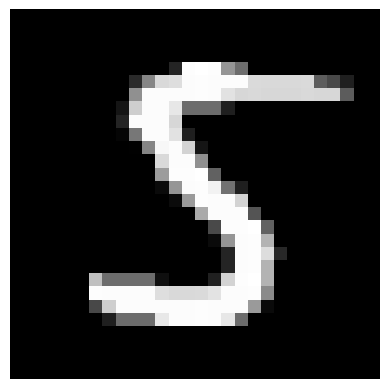

In [47]:
# Now here begans the tricky step " model evolution"

# pick a random index from the test set
idx = np.random.randint(0, test_x.shape[0])

# get the corresponding image data
img = test_x[idx].reshape(28, 28)   # 28x28 because 784 pixels

# predict the digit
pred_class = np.argmax(model.predict(test_x[idx].reshape(1, 784)), axis=1)[0]

print("Prediction is:", pred_class)

# show the image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
## variables are adjustable and then our model will perform better IA
#so we are going to adjust hyper parameters